In [7]:
# Import libraries necessary for this project\n",
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from IPython.display import display # Allows the use of display() for DataFrames,
from __future__ import division
%matplotlib inline

data = pd.read_csv("../input/HR_comma_sep.csv")
display(data.shape)
display(data.head(n=3))


(14999, 10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [8]:
#data.describe()
data["sales"] = data["sales"].astype("category")
data["sales"] = data["sales"].cat.codes
data["salary"] = data["salary"].astype("category")
data["salary"] = data["salary"].cat.codes
#data.dtypes
display(data.head(n=3))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2


In [18]:
print(data["salary"].unique())

[1 2 0]


In [9]:
left_pc = (data[data["left"]==1].count()/data.count())*100
display(left_pc[0])
#data[data["left"]==0].count()

23.80825388359224

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99733ce5c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f99722e2fd0>]], dtype=object)

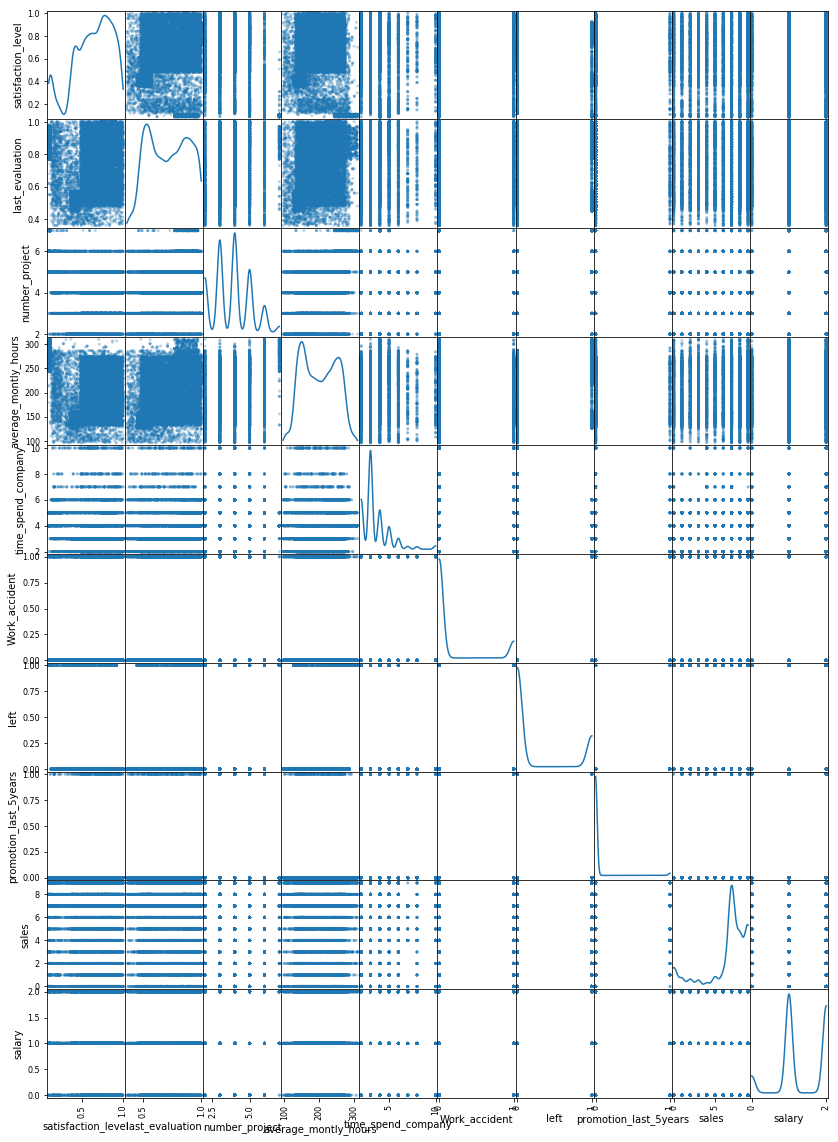

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha=0.3, figsize=(14,20), diagonal='kde')

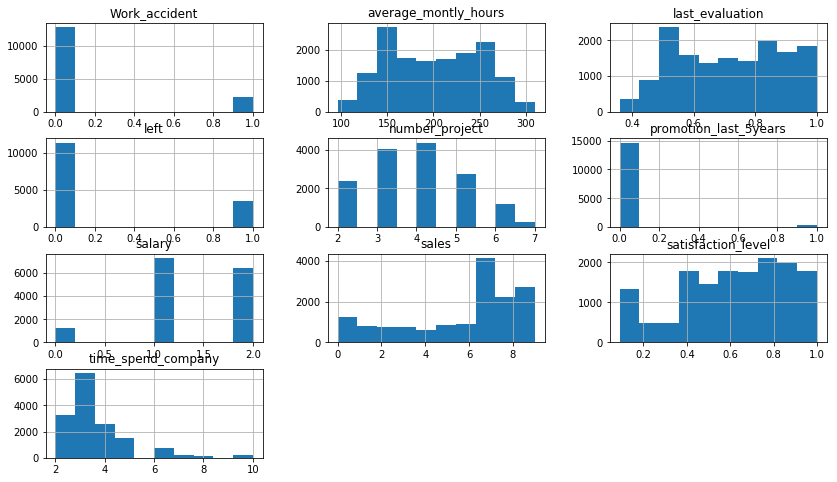

In [11]:
data.hist(figsize=(14,8))
plt.show()

In [12]:
target_label = data["left"]
features = data.drop("left",axis=1)
#display(features.head(n=3))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target_label, test_size=0.2, random_state=20)
print (format(X_train.shape[0]))
print (format(X_test.shape[0]))

11999
3000


In [24]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, fbeta_score

clf = AdaBoostClassifier(n_estimators=200)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print("Accuracy=",accuracy_score(y_test,pred))
print("F-score=",fbeta_score(y_test,pred,beta=0.5))

Accuracy= 0.958333333333
F-score= 0.912075363974
